<a href="https://colab.research.google.com/github/SachinScaler/MachineLearning_Jan24/blob/main/knn_blinkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEMO Link: http://vision.stanford.edu/teaching/cs231n-demos/knn/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://gist.github.com/singhsidhukuldeep/cc3c9597bce35f5f242a921eb3361c75/raw/54227431f0dc8ac1c438f438e2174d181fdda330/blinkit_multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|purchase history of Fresh food|
|**Milk**|purchase history of milk product|
|**Grocery**|purchase history of Grocery|
|**Frozen**|purchase history of Frozen food|
|**Detergents_Paper**|purchase history of washing products|
|**Delicassen**|purchase history of imported products, cooked meat|
|**class**|Store catgeory based on demand on products|





<Axes: xlabel='class', ylabel='count'>

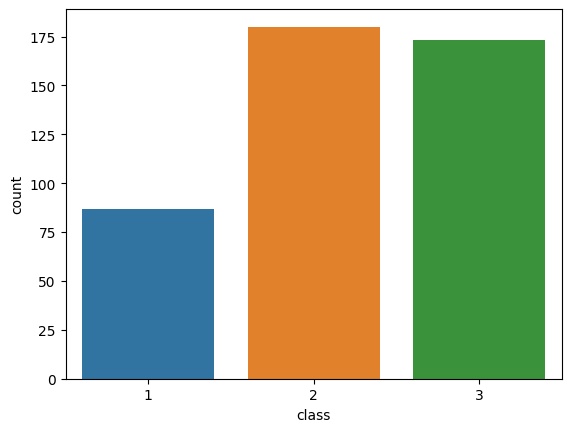

In [ ]:
import seaborn as sns
sns.countplot(data=df, x="class")

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
print(X.shape)
X = pca.fit_transform(X)
print(X.shape)

(440, 7)
(440, 2)


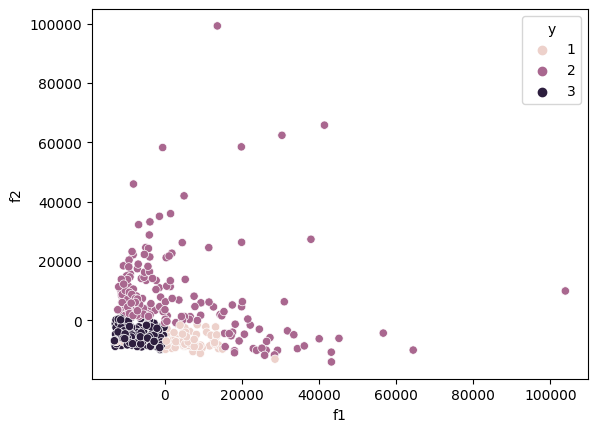

In [ ]:
df2 = pd.DataFrame(X, columns=['f1', 'f2'])
df2['y'] = y

sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

In [ ]:
## train test split

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                    y.values[:,0],
                                                    test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                    y_train_val,
                                                    test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 2) (247,)
(83, 2) (83,)
(110, 2) (110,)


In [ ]:
# standardisation
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [ ]:
X_train = (X_train-mu)/sig
X_val = (X_val-mu)/sig
X_test = (X_test-mu)/sig

In [ ]:
## KNN Algo

def knn(X,Y,queryPoint,k=5):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )
    print('all dist: ', dist[:7])

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    print('Distances with labels: ', distances[:7])

    # sort the distances
    distances = sorted(distances, key=lambda x:x[0])
    print('Distances sorted: ', distances[:7])

    # Nearest/First K points
    distances = distances[:k]
    print('Distances top k: ', distances)

    # print(f'k nearest neighbors with the distance and class label :{distances}')
    distances = np.array(distances)
    print('Distances top k as np array: ', distances)

    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    classes_counts = np.unique(distances[:,1],return_counts=True)
    print('classes_counts:', classes_counts)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]
    print(f"Prediction: {pred} at index {index} in classes_counts {classes_counts}")

    return int(pred)
## predicting
print(X_test[50])
print(knn(X_train, y_train, X_test[50], k=100))

[0.12263833 1.24645031]
all dist:  [1.94061733 1.57859696 3.53453359 1.96153762 1.57265122 1.03241858
 1.78373319]
Distances with labels:  [(1.9406173337362433, 2), (1.578596955973962, 1), (3.5345335899778134, 2), (1.9615376212335691, 3), (1.5726512150188974, 3), (1.032418584928892, 2), (1.7837331881688139, 3)]
Distances sorted:  [(0.18070886525751703, 2), (0.3267729243339275, 2), (0.3939690441373117, 2), (0.413636334408564, 2), (0.5303829069102112, 2), (0.5837131559530532, 2), (0.6197074402197672, 2)]
Distances top k:  [(0.18070886525751703, 2), (0.3267729243339275, 2), (0.3939690441373117, 2), (0.413636334408564, 2), (0.5303829069102112, 2), (0.5837131559530532, 2), (0.6197074402197672, 2), (0.6562083252456906, 2), (0.6564400793625751, 2), (0.7019232075553429, 2), (0.7099708682714401, 2), (0.820151844465965, 2), (0.8640498105227896, 2), (0.8957859669776321, 2), (0.9290531129950909, 2), (0.9354856979847097, 2), (0.9378460246069392, 2), (0.9499654171812999, 2), (0.955722141790368, 2), 

In [ ]:
## KNN Algo

def knn(X,Y,queryPoint,k=5):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances, key=lambda x:x[0])
    # Nearest/First K points
    distances = distances[:k]

    # print(f'k nearest neighbors with the distance and class label :{distances}')
    distances = np.array(distances)

    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred)

In [ ]:
## predicting
print(X_test[50])
print(knn(X_train, y_train, X_test[50]))

[0.12263833 1.24645031]
2


In [ ]:
print(y_test[50])

2


In [ ]:
y_pred = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    y_pred[i] = knn(X_train, y_train, X_test[i])

print(f'Accuracy : ', round(100*(y_pred == y_test).sum()/y_pred.shape[0], 2))

Accuracy :  95.45


In [ ]:
# Hyper-parameter tuning
def give_me_accuracy(k, dataset = "test"):
    y_pred = []

    if dataset=='test':
        for Xq in X_test:
            p = knn(X_train, y_train, Xq, k = k)
            y_pred.append(p)

        y_pred = np.array(y_pred)

        acc = (y_pred == y_test).sum() / len(y_test)
    elif dataset=='train':
        for Xq in X_train:
            p = knn(X_train, y_train, Xq, k = k)
            y_pred.append(p)

        y_pred = np.array(y_pred)

        acc = (y_pred == y_train).sum() / len(y_train)
    return acc.round(5)*100

In [ ]:
train_scores = []
test_scores = []
k_values = []


for k in range(1, 15):
    k_values.append(k)
    train_scores.append(give_me_accuracy(k, dataset = "train"))
    test_scores.append(give_me_accuracy(k, dataset = "test"))

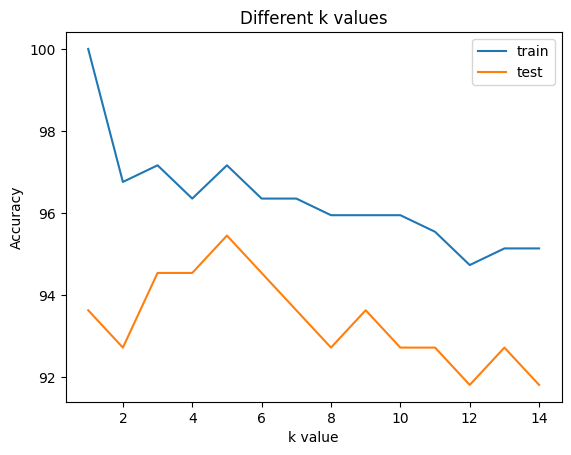

In [ ]:
plt.plot(k_values, train_scores, label = "train")
plt.plot(k_values, test_scores, label = "test")
plt.title("Different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
print(np.argmax(test_scores))
print("best k is", k_values[np.argmax(test_scores)])

4
best k is 5


In [ ]:
# Sklearn's KNN implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9545454545454546

In [ ]:
x_q = [X_test[50]]
y_q = y_test[50]
print(x_q)
print(y_q)
print(knn.predict(x_q))
print(knn.predict_proba(x_q))
print(knn.kneighbors(x_q))

[array([0.12263833, 1.24645031])]
2
[2]
[[0. 1. 0.]]
(array([[0.18070887, 0.32677292, 0.39396904, 0.41363633, 0.53038291]]), array([[101, 176, 108,  30, 130]]))


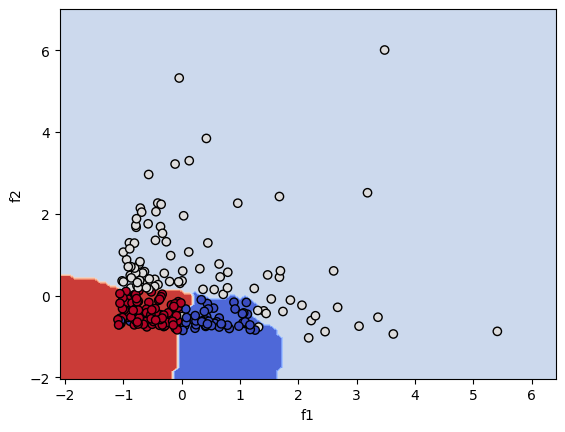

In [ ]:
import matplotlib.pyplot as plt
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
from sklearn.inspection import DecisionBoundaryDisplay
# Plotting the boundaries
disp = DecisionBoundaryDisplay.from_estimator(knn,
                                              X_train,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train[:, 0], X_train[:, 1],
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(classification_report(y_test, y_pred))
plt.show()

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       0.98      0.94      0.96        47
           3       0.96      1.00      0.98        43

    accuracy                           0.95       110
   macro avg       0.94      0.95      0.94       110
weighted avg       0.95      0.95      0.95       110



## KNN imputation

In [ ]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
import pandas as pd
import numpy as np

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df_imp.shape)
df_imp.head()

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 27.1MB/s]
(267, 7)


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
df_imp.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation
])

# Fit and transform the data using the pipeline
X_transformed = pipeline.fit_transform(df_imp)

# Creating dataframe
X_transformed = pd.DataFrame(X_transformed,columns=df_imp.columns)

X_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [ ]:
X_transformed.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64